In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
weighted = np.load('calibration.npy') - np.min(np.load('calibration.npy'))#*100-100
#unweighted = np.load('unweighted.npy')/np.min(np.load('unweighted.npy'))*100-100

In [5]:
np.min(np.load('calibration.npy'))

4.810690478303285

In [81]:
# Sector reductions
prodfuncs = ['Leo', 'Str', 'Hal', 'Wea', 'Lin']
consumer_facing = ['70%', '75%', '80%', '85%', '90%', '95%', '100%']
industry = ['0%', '10%', '20%', '30%', '40%']
retail = ['0%', '20%', '40%', '60%']
other_demand = ['2.5%', '5%', '7.5%', '10%', '12.5%', '15%', '17.5%']
tau = ['1', '7', '14', '21', '28']

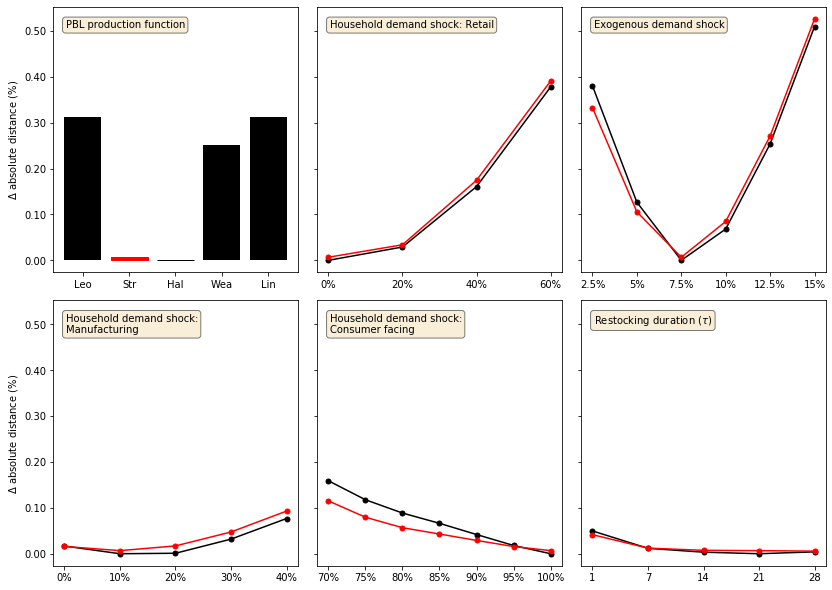

In [90]:
fig,ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(11.7, 8.3))

ax[0,0].bar(prodfuncs, weighted[:,-1,1,0,2,3], color='black')
ax[0,0].set_ylabel('$\Delta$ absolute distance (%)')
from matplotlib.ticker import FormatStrFormatter
ax[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0,0].text(0.05, 0.95, "PBL production function", transform=ax[0,0].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[0,0].get_children()[2].set_color('black')
ax[0,0].get_children()[1].set_color('red')

ax[0,1].plot(retail, weighted[2,-1,1,:,2,3], marker='o', markersize=5, color='black')
ax[0,1].plot(retail, weighted[1,-1,1,:,2,3], marker='o', markersize=5, color='red')
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0,1].text(0.05, 0.95, "Household demand shock: Retail", transform=ax[0,1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

ax[0,2].plot(other_demand[:-1], weighted[2,-1,1,0,:-1,3], marker='o', markersize=5, color='black')
ax[0,2].plot(other_demand[:-1], weighted[1,-1,1,0,:-1,3], marker='o', markersize=5, color='red')
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0,2].text(0.05, 0.95, "Exogenous demand shock", transform=ax[0,2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

ax[1,0].plot(industry, weighted[2,-1,:,0,2,3], marker='o', markersize=5, color='black')
ax[1,0].plot(industry, weighted[1,-1,:,0,2,3], marker='o', markersize=5, color='red')
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[1,0].text(0.05, 0.95, "Household demand shock:\nManufacturing", transform=ax[1,0].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,0].set_ylabel('$\Delta$ absolute distance (%)')

ax[1,1].plot(consumer_facing, weighted[2,:,1,0,2,3], marker='o', markersize=5, color='black')
ax[1,1].plot(consumer_facing, weighted[1,:,1,0,2,3], marker='o', markersize=5, color='red')
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[1,1].text(0.05, 0.95, "Household demand shock:\nConsumer facing", transform=ax[1,1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

ax[1,2].plot(tau, weighted[2,-1,1,0,2,:], marker='o', markersize=5, color='black')
ax[1,2].plot(tau, weighted[1,-1,1,0,2,:], marker='o', markersize=5, color='red')
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[1,2].text(0.05, 0.95, "Restocking duration ($\\tau$)", transform=ax[1,2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

plt.tight_layout()
fig.savefig('slice_minimum.pdf')
plt.show()
plt.close()

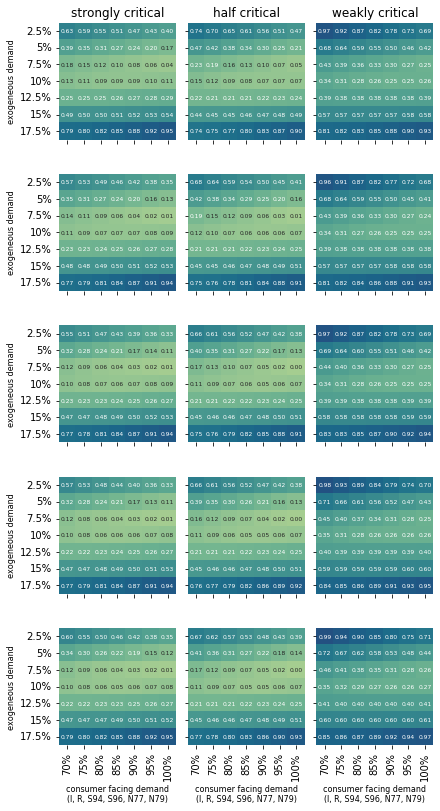

In [88]:
fig,ax=plt.subplots(nrows=len(industry), ncols=3, sharex=True, sharey=True, figsize=(0.75*8.3,11.7))

for i,val in enumerate(tau):

    # Column 1
    ax[i,0] = sns.heatmap(np.transpose(weighted[1,:,1,0,:,i]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False, ax=ax[i,0], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")
    # Column 2
    ax[i,1] = sns.heatmap(np.transpose(weighted[2,:,1,0,:,i]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False,ax=ax[i,1], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")
    # Column 3
    ax[i,2] = sns.heatmap(np.transpose(weighted[3,:,1,0,:,i]), xticklabels=consumer_facing, yticklabels=other_demand,
                          annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False,ax=ax[i,2], square=True, annot_kws={"fontsize": 6},
                          cmap="crest")

    ax[i,0].set_ylabel('exogeneous demand', size=8)

cols = ['strongly critical', 'half critical', 'weakly critical']
for axs, col in zip(ax[0,:], cols):
    axs.set_title(col)

ax[-1,0].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
ax[-1,1].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
ax[-1,2].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
 
plt.tight_layout()
plt.savefig(f'sensitivity_analysis_tau.pdf')
plt.show()
plt.close()

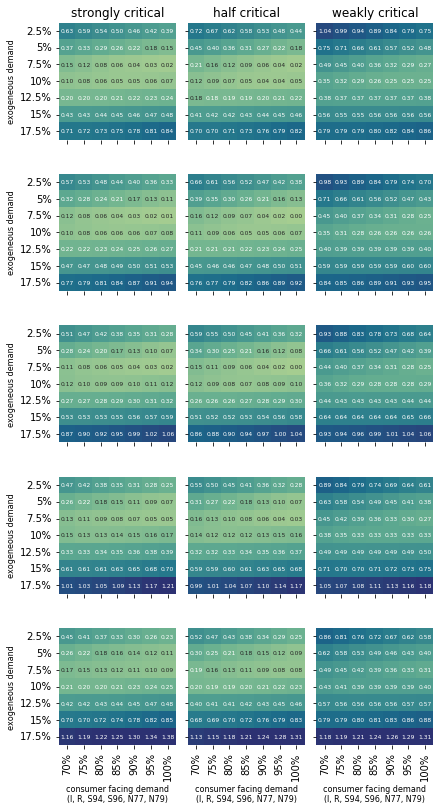

In [89]:
fig,ax=plt.subplots(nrows=len(industry), ncols=3, sharex=True, sharey=True, figsize=(0.75*8.3,11.7))

for i,val in enumerate(industry):

    # Column 1
    ax[i,0] = sns.heatmap(np.transpose(weighted[1,:,i,0,:,3]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False, ax=ax[i,0], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")
    # Column 2
    ax[i,1] = sns.heatmap(np.transpose(weighted[2,:,i,0,:,3]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False,ax=ax[i,1], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")
    # Column 3
    ax[i,2] = sns.heatmap(np.transpose(weighted[3,:,i,0,:,3]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False,ax=ax[i,2], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")

    ax[i,0].set_ylabel('exogeneous demand', size=8)

cols = ['strongly critical', 'half critical', 'weakly critical']
for axs, col in zip(ax[0,:], cols):
    axs.set_title(col)

ax[-1,0].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
ax[-1,1].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
ax[-1,2].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)

plt.tight_layout()
plt.savefig(f'sensitivity_analysis_business.pdf')
plt.show()
plt.close()